# Mit Datenbanken arbeiten
Kapitel 3.7 aus dem Buch "Fachstufe Technische IT-Berufe Lernfelder 6 – 9" Seite 262 ff.  
Kapitel 6.2 aus dem Buch "Daten- und Prozessanalyse für Fachinformatiker\*innen".  
  
Erst mal ein kurzes Beispiel zur Erkärung **"if \_\_name\_\_ == '\_\_main\_\_':"** in einer .py Datei

In [ ]:
# statistics.py Datei importieren und Abfrage der Variable __name__
import stat_BBQ
#import stat_ohne
# Wenn das die Datei *.py direkt in Python geöffnet wird wird die Variable __name__ mit __main__ gesetzt
# Beim 'import statistics' wird die Variable __name__ nicht gesetzt und das Programm nicht ausgeführt!
# Man ist ja nur an den Funktionen interessiert. :-)
__name__

In [ ]:
# Anzeige der Funktionen
dir(stat_BBQ)

In [ ]:
# Hilfe einer Funktion (Docstring) anzeigen
help(stat_BBQ.max)

In [ ]:
# Test einer Funktion
stat_BBQ.max([1,4,6,3,7,9])

Testen Sie auch das Programm 'statistics.py' in einer Shell mit dem Aufruf "python statistics.py"  

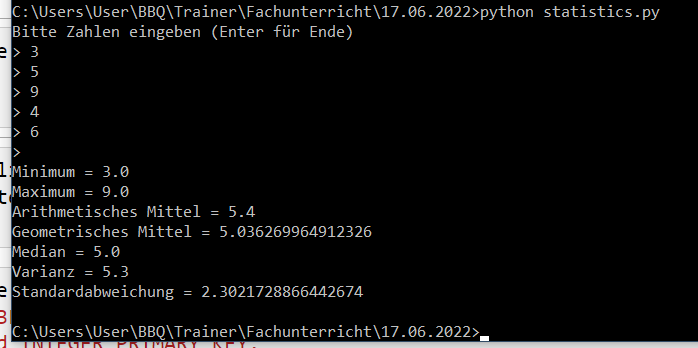  

Hier wird die Variable \_\_name\_\_ auf \_\_main\_\_ gesetzt und das Programm ausgeführt.  

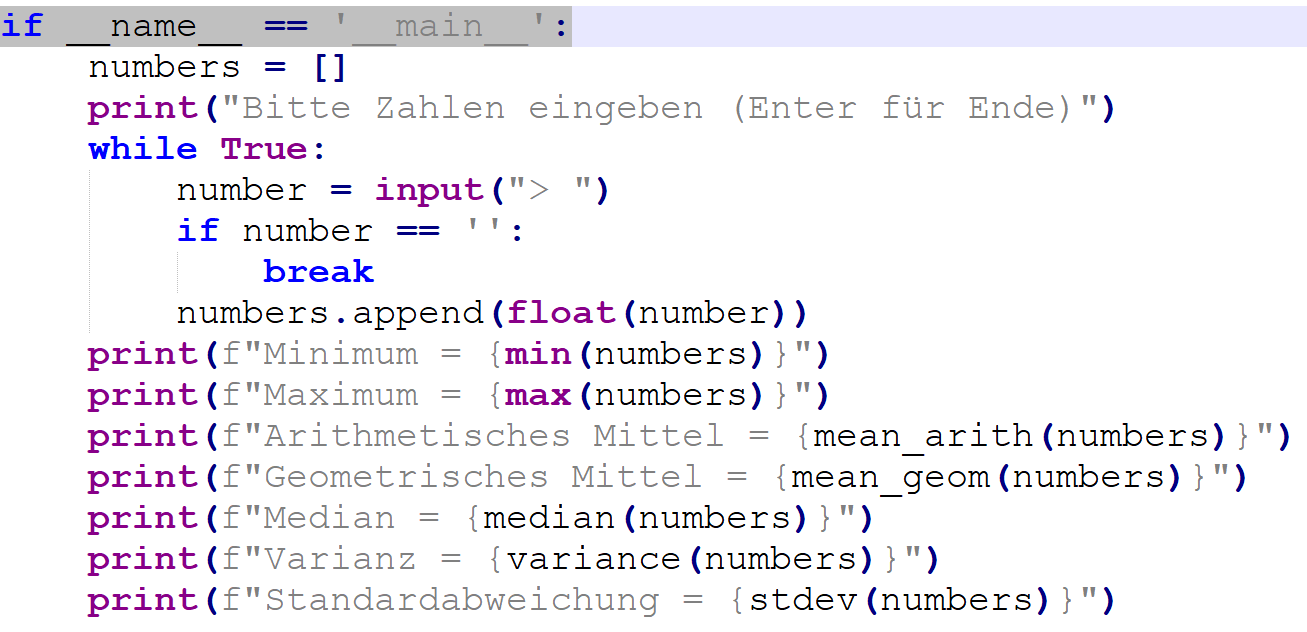

# Datenbank im Zugriff


In [1]:
import sqlite3
db = sqlite3.connect("data.db")


## UML Diagramm Iris-DB  

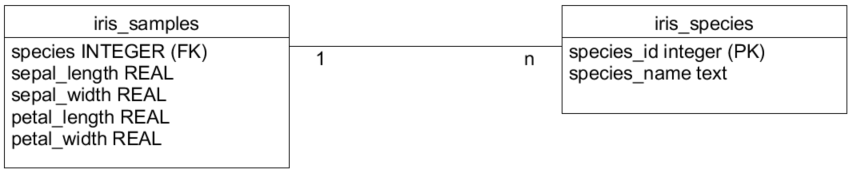

In [2]:
db.execute("""
CREATE TABLE iris_species (
species_id INTEGER PRIMARY KEY,
species_name TEXT
)
""")

In [3]:
db.execute("""
CREATE TABLE iris_samples (
sepal_length REAL,
sepal_width REAL,
petal_length REAL,
petal_width REAL,
species INTEGER
)
""")

In [9]:
db.execute("CREATE INDEX i_species ON iris_samples(species)")


OperationalError: index i_species already exists

In [5]:
#iris_species = ["Iris-setosa", "Iris-virginica", "Iris-versicolor"]
iris_species = ["Iris-virginica", "Iris-versicolor", "Iris-setosa"]
for species in iris_species:
    db.execute("INSERT INTO iris_species (species_name) VALUES (?)",[species])

In [7]:
#result = db.execute("SELECT species_name FROM iris_species")
result = db.execute("SELECT * FROM iris_species")
print(result, type(result))
for line in result:
    print(line, type(line))

<sqlite3.Cursor object at 0x0000020F732CC6C0> <class 'sqlite3.Cursor'>
(1, 'Iris-virginica') <class 'tuple'>
(2, 'Iris-versicolor') <class 'tuple'>
(3, 'Iris-setosa') <class 'tuple'>


In [8]:
result = db.execute("""SELECT species_id, species_name
FROM iris_species
ORDER BY species_name""")
x = result.fetchall()  # in Liste speichern, da result ein Speicherobjekt ist!
print(x, type(x))
### Alternativ ###
# result = db.execute("""SELECT species_id, species_name
# FROM iris_species
# ORDER BY species_name""").fetchall()  # in Liste speichern, da result ein Speicherobjekt ist!
# print(result)

[(3, 'Iris-setosa'), (2, 'Iris-versicolor'), (1, 'Iris-virginica')] <class 'list'>


In [13]:
result = db.execute("""SELECT * FROM iris_species LIMIT 2""")
result.fetchall()


[(1, 'Iris-virginica'), (2, 'Iris-versicolor')]

In [16]:
result = db.execute("""SELECT * FROM iris_species LIMIT 1, 2""")
result.fetchall()

[(2, 'Iris-versicolor'), (3, 'Iris-setosa')]

In [21]:
result = db.execute("""SELECT * FROM iris_species
WHERE species_id = ?""", [3])
result.fetchall()

[(3, 'Iris-setosa')]

In [24]:
result = db.execute("""SELECT * FROM iris_species
WHERE species_id < ?""", [3])
result.fetchall()

[(1, 'Iris-virginica'), (2, 'Iris-versicolor')]

In [27]:
result = db.execute("""SELECT * FROM iris_species
WHERE species_id IN (?, ?, ?)""", [1, 3, 4])
result.fetchall()

[(1, 'Iris-virginica'), (3, 'Iris-setosa')]

In [32]:
result = db.execute("""SELECT * FROM iris_species
WHERE species_name LIKE ?""", ['%l%'])
result.fetchall()


[(2, 'Iris-versicolor')]

In [33]:
db.commit()

In [ ]:
import sqlite3
import json
from sys import exit

irises = []
# Datei vorhanden?
try:
    json_file = open("iris.json", "r")
except FileNotFoundError:
    print("Datei iris.json nicht gefunden.")
    exit()

# JSON auslesen und umwandeln
try:
    irises = json.load(json_file, object_hook = lambda obj: list(obj.values()))
except json.JSONDecodeError as e:
    print(f"Fehler im JSON-Code: {e}")
    exit()

try:
    db = sqlite3.connect("data.db")
    # Dictionary für die Spezies-Zuordnung
    species = {}
    result = db.execute("SELECT species_name, species_id FROM iris_species")
    for line in result:
        print(line)
        species[line[0]] = line[1]
    print(species)
    #print(irises)
    # Daten einfügen
    nd = 0
    for iris in irises:
        db.execute("""INSERT INTO iris_samples
            (sepal_length, sepal_width, petal_length, petal_width, species)
            VALUES (?, ?, ?, ?, ?)""",
            [iris[0], iris[1], iris[2], iris[3], species[iris[4]]])
        nd += 1
    # Änderung permanent machen (Commit)
    db.commit()
    # Wie viele Datensätze gibt es und wie viele wurden eingefügt?
    result = db.execute("SELECT COUNT(*) FROM iris_samples")
    number = result.fetchone()[0]
    print(f"{number} Datensätze insgesamt.")
    print(f"{nd} Datensätze eingefügt.")
except sqlite3.Error as e:
    print(f"Datenbankfehler: {e}")
    exit()

{'Iris-virginica': 1, 'Iris-versicolor': 2, 'Iris-setosa': 3}
150 Datensätze insgesamt.
150 Datensätze eingefügt.


In [ ]:
import sqlite3
db = sqlite3.connect("data.db")

In [ ]:
result = db.execute("""SELECT * FROM iris_species LIMIT 3""")
result.fetchall()


In [ ]:
#result = db.execute("""SELECT * FROM iris_samples LIMIT 2""")
result = db.execute("""SELECT * FROM iris_samples""")

res = result.fetchall()


In [ ]:
res[0::50]

In [ ]:
result = db.execute("""SELECT SAM.sepal_length, SAM.sepal_width,
SAM.petal_length, SAM.petal_width, SPE.species_name
FROM iris_samples SAM
INNER JOIN iris_species SPE ON SPE.species_id = SAM.species""")
samples = result.fetchall()
len(samples)

In [ ]:
samples[0::50]

In [ ]:
samples[0]

In [ ]:
samples[50]

In [ ]:
samples[100]

In [ ]:
samples[45:55]

In [ ]:
result = db.execute("""SELECT sepal_length, sepal_width,
petal_length, petal_width, species_name
FROM iris_samples
INNER JOIN iris_species ON species_id = species
WHERE sepal_length > 7.3""")
result.fetchall()

In [ ]:
# Alle Spalten der verbundenen Tabellen werden im Ergebnis angezeigt (*)
# result = db.execute("""SELECT * FROM iris_samples
# INNER JOIN iris_species ON species_id = species
# WHERE species_name = 'Iris-virginica'""")
result = db.execute("""SELECT * FROM iris_samples
INNER JOIN iris_species ON species_id = species
WHERE sepal_length > 7.3""")
result.fetchall()


In [ ]:
result = db.execute("""SELECT species_name, sepal_length, COUNT(*)
FROM iris_species
INNER JOIN iris_samples ON species_id = species
GROUP BY species_name, sepal_length""")         # Reihenfolge tauschen --> andere Sortierung
#GROUP BY sepal_length, species_name""")         # Reihenfolge tauschen --> andere Sortierung

result.fetchall()

In [ ]:
result = db.execute("""SELECT species_name, AVG(sepal_length),
AVG(sepal_width), AVG(petal_length), AVG(petal_width)
FROM iris_species
INNER JOIN iris_samples ON species_id = species
GROUP BY species_id""")
result.fetchall()

In [ ]:
x = db.execute("SELECT species_name FROM iris_species").fetchall()
print(x, type(x))
print(x[0])
for i in x:
    if "Iris-elongata" in i[0]:
        print('Treffer')
    

In [ ]:
db.execute("INSERT INTO iris_species (species_name) VALUES (?)",
["Iris-elongata"])

In [ ]:
result = db.execute("SELECT * FROM iris_species")
result.fetchall()


In [ ]:
db.execute("UPDATE iris_species SET species_name = ? WHERE species_id = ?",
           ["Iris-scariosa", 4])

In [ ]:
db.execute("UPDATE iris_species SET species_name = ?",
           ["Iris-scariosa"])

In [ ]:
result = db.execute("SELECT * FROM iris_species")
result.fetchall()

In [ ]:
db.execute("DELETE FROM iris_species WHERE species_id = ?", [4])

In [ ]:
result = db.execute("SELECT * FROM iris_species")
result.fetchall()

In [ ]:
db.commit()

In [ ]:
db.close()